In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
print(tf.__version__)

2.12.0


In [ ]:
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [ ]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [ ]:
train_images.shape

(60000, 28, 28)

In [ ]:
test_images.shape

(10000, 28, 28)

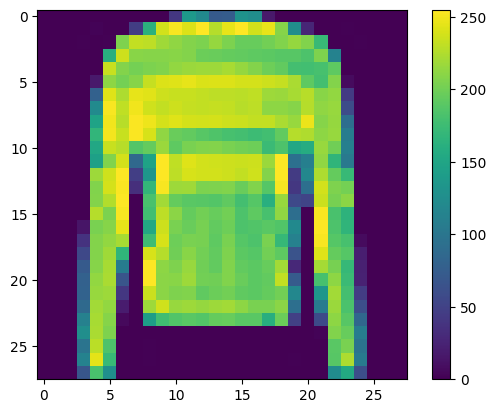

In [ ]:
plt.figure()
plt.imshow(train_images[1345])
plt.colorbar()
plt.grid(False)
plt.show()

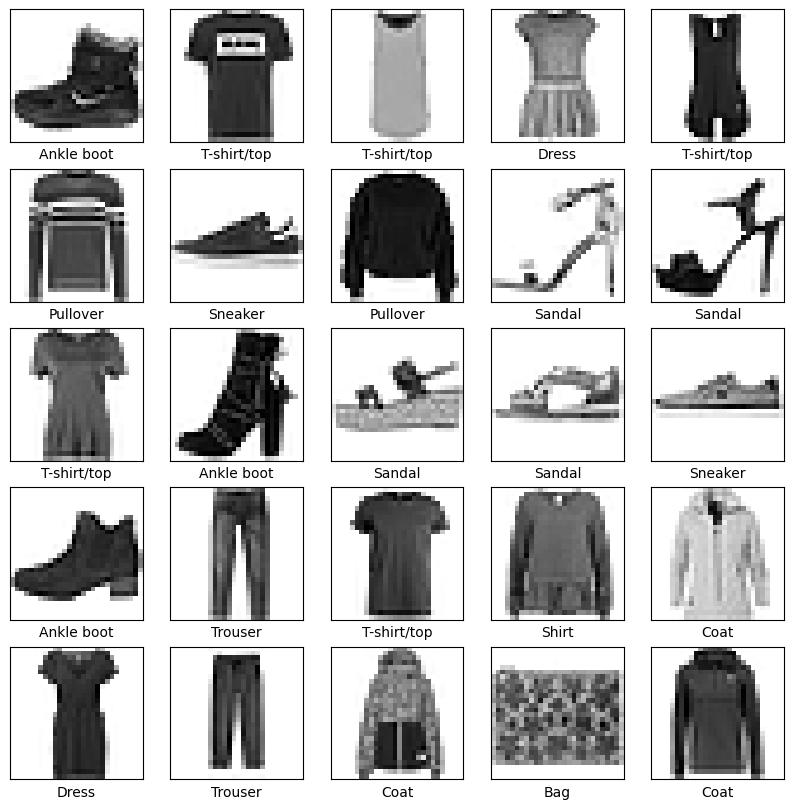

In [ ]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPool2D(strides=(2,2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPool2D(strides=(2,2)),
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
    tf.keras.layers.MaxPool2D(strides=(2,2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10)
])

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
model.fit(train_images, train_labels, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 90s 47ms/step - loss: 1.1278 - accuracy: 0.6981
Epoch 2/5
1875/1875 [==============================] - 70s 37ms/step - loss: 0.5984 - accuracy: 0.7861
Epoch 3/5
1875/1875 [==============================] - 69s 37ms/step - loss: 0.5210 - accuracy: 0.8153
Epoch 4/5
1875/1875 [==============================] - 70s 37ms/step - loss: 0.4601 - accuracy: 0.8353
Epoch 5/5
1875/1875 [==============================] - 70s 38ms/step - loss: 0.4217 - accuracy: 0.8481


In [ ]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)


313/313 - 3s - loss: 0.4529 - accuracy: 0.8386 - 3s/epoch - 10ms/step

Test accuracy: 0.8385999798774719


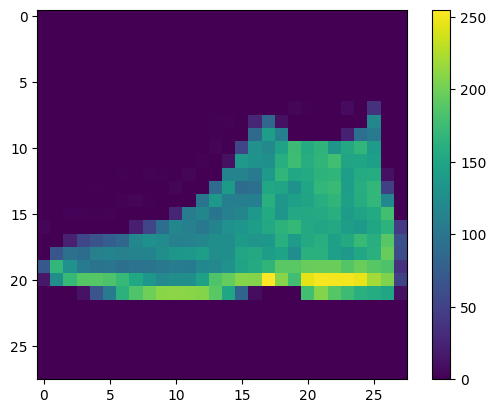

In [ ]:
plt.figure()
plt.imshow(test_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [ ]:
l = list(model.predict(test_images)[0])
l

313/313 [==============================] - 3s 11ms/step


[-4.5698647,
 -6.7925305,
 -2.7438939,
 -5.097269,
 -3.0103903,
 0.06517321,
 -5.1205425,
 6.067843,
 -3.790434,
 7.3161426]

In [ ]:
class_names[l.index(max(l))]

'Ankle boot'

In [ ]:
class_names[test_labels[0]]

'Ankle boot'

In [ ]:
predicted_classes = np.argmax(model.predict(test_images),axis=-1)
predicted_classes.shape

313/313 [==============================] - 4s 13ms/step


(10000,)

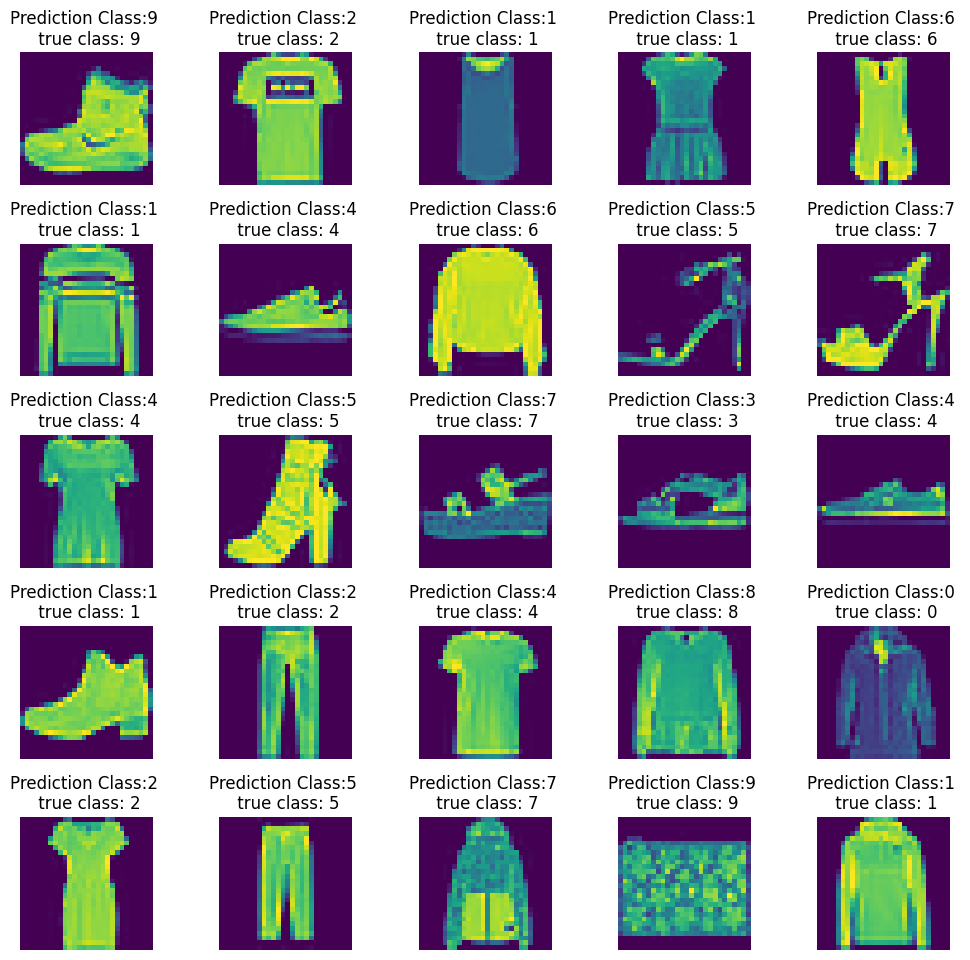

In [ ]:
L = 5
W = 5
fig,axes = plt.subplots(L,W,figsize = (12,12))
axes = axes.ravel()
for i in np.arange(0,L*W):
  axes[i].imshow(train_images[i].reshape(28,28))
  axes[i].set_title('Prediction Class:{1} \n true class: {1}'.format(predicted_classes[i],test_labels[i]))
  axes[i].axis('off')
  plt.subplots_adjust(wspace = 0.5)

In [ ]:
import sklearn.metrics as metrics

In [ ]:
y_pred_ohe=model.predict(test_images)
y_pred_labels=np.argmax(y_pred_ohe,axis=1)
confusion_matrix=metrics.confusion_matrix(y_true=test_labels,y_pred=y_pred_labels)

313/313 [==============================] - 3s 11ms/step


In [ ]:
print(confusion_matrix)

[[795   4  52  40   5   1  82   3  18   0]
 [  4 972   1  17   2   0   1   0   3   0]
 [ 17   5 864  10  31   0  61   0  12   0]
 [ 25  12  40 866  22   3  25   1   5   1]
 [  1   5 187  37 601   0 162   0   7   0]
 [  0   1   0   5   0 921   0  53   2  18]
 [194   8 153  42  66   1 503   1  32   0]
 [  0   0   0   0   0  11   0 965   0  24]
 [  3   1   6   4   3   7   7   1 968   0]
 [  1   2   0   1   0  10   0  54   1 931]]


In [ ]:
from sklearn.metrics import classification_report
classes = 10
targets = ["Class {}".format(i) for i in range(classes)]
print(classification_report(test_labels, predicted_classes, target_names = targets))

              precision    recall  f1-score   support

     Class 0       0.76      0.80      0.78      1000
     Class 1       0.96      0.97      0.97      1000
     Class 2       0.66      0.86      0.75      1000
     Class 3       0.85      0.87      0.86      1000
     Class 4       0.82      0.60      0.69      1000
     Class 5       0.97      0.92      0.94      1000
     Class 6       0.60      0.50      0.55      1000
     Class 7       0.90      0.96      0.93      1000
     Class 8       0.92      0.97      0.95      1000
     Class 9       0.96      0.93      0.94      1000

    accuracy                           0.84     10000
   macro avg       0.84      0.84      0.84     10000
weighted avg       0.84      0.84      0.84     10000

